In [423]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import math 

In [424]:
plt.style.use('seaborn-whitegrid')

In [425]:
SAVE_DIRECTORY = 'csv/'

In [426]:
red_df_list = []
red_num_list = []
marker_df_list = []

In [427]:
group_num = int(input('Please enter the number of groups. : '))

In [428]:
for i in range(group_num):
    red_num = int(input('Please enter the number of red by' + str(i + 1) + 'groups. : '))
    red_num_list.append(red_num)
    red_df_list.append([])

In [429]:
# RedのCSVファイルを読み込み
for i in range(group_num):
    for j in range(red_num_list[i]):
        df = pd.read_csv(SAVE_DIRECTORY + 'ex_red' + str(i + 1) + '-' + str(j + 1) + '.csv')
        red_df_list[i].append(df)

In [430]:
for i in range(group_num):
    marker_df = pd.read_csv(SAVE_DIRECTORY + 'ex_marker' + str(i + 1) + '.csv')
    marker_df_list.append(marker_df)

In [431]:
obstacle_num = int(input('Please enter the number of obstacle.'))

In [432]:

# マップ(全体)のCSVファイルの読み込み
obstacle_df_list = []
for i in range(obstacle_num):
  df = pd.read_csv(SAVE_DIRECTORY + 'obstacle' + str(i + 1) + '.csv')
  obstacle_df_list.append(df)

In [433]:
x_list = []
y_list = []
for i in range(group_num):
    x_list.append([])
    y_list.append([])
    for j in range(red_num_list[i]):
        x_list[i].append(red_df_list[i][j]['x'])
        y_list[i].append(red_df_list[i][j]['y'])

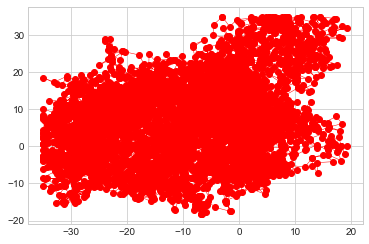

In [434]:
# ランダムウォークのみの出力
x = x_list[0][0]
y = y_list[0][0]
plt.plot(x, y, '-or', linewidth=0.5)
plt.show()

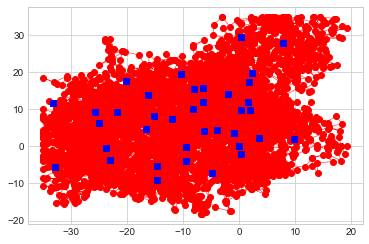

In [435]:
# マーカーを加えた出力
x = x_list[0][0]
y = y_list[0][0]
plt.plot(x, y, '-or', linewidth=0.5)
plt.plot(marker_df_list[0]['x'], marker_df_list[0]['y'], 'sb')
plt.show()

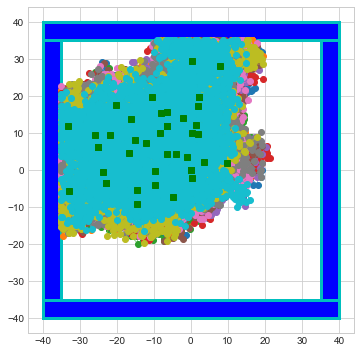

In [436]:
# 障害物を加えた出力
arr_num = 0

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
for j in range(red_num_list[arr_num]):
    plt.plot(x_list[arr_num][j], y_list[arr_num][j], '-o', linewidth=0.5)
#plt.plot(x, y, '-or', linewidth=0.5)
plt.plot(marker_df_list[arr_num]['x'], marker_df_list[arr_num]['y'], 'sg')

for i in range(obstacle_num):
        obstacle = patches.Rectangle(
            xy = (obstacle_df_list[i].iloc[0, 1], obstacle_df_list[i].iloc[0, 2]),
            width = obstacle_df_list[i].iloc[0, 5],
            height = obstacle_df_list[i].iloc[0, 4],
            angle = 0,
            facecolor = "b",
            edgecolor = "c",
            linewidth = 3,
            fill = True,
        )
        ax.add_patch(obstacle)

plt.show()

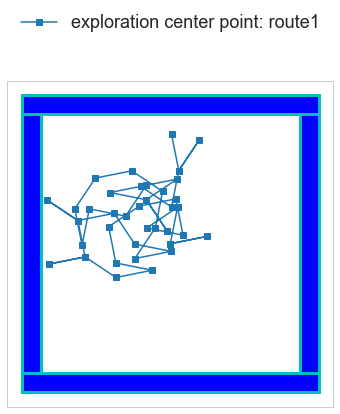

In [437]:
# Red複数台での出力
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, aspect="equal")

for i in range(group_num):
    #for j in range(red_num_list[i]):
    #    plt.plot(x_list[i][j], y_list[i][j], '-or', linewidth=0.5)
    
    plt.plot(marker_df_list[i]['x'], marker_df_list[i]['y'], '-s', label="exploration center point: route" + str(i + 1))


for i in range(obstacle_num):
        obstacle = patches.Rectangle(
            xy = (obstacle_df_list[i].iloc[0, 1], obstacle_df_list[i].iloc[0, 2]),
            width = obstacle_df_list[i].iloc[0, 5],
            height = obstacle_df_list[i].iloc[0, 4],
            angle = 0,
            facecolor = "b",
            edgecolor = "c",
            linewidth = 3,
            fill = True,
        )
        ax.add_patch(obstacle)

ax.legend(loc = 'lower center', bbox_to_anchor=(.5, 1.1), fontsize=18)
plt.xticks([])
plt.yticks([])
plt.show()

No handles with labels found to put in legend.


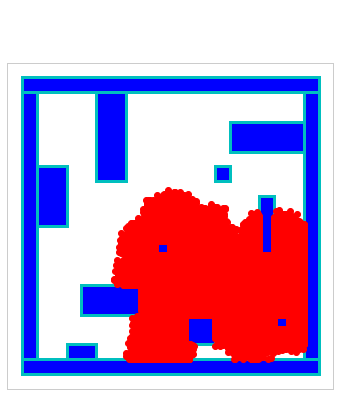

In [235]:
# Red複数台での出力
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, aspect="equal")

for i in range(group_num):
    for j in range(red_num_list[i]):
        plt.plot(x_list[i][j], y_list[i][j], '-or', linewidth=0.5)
    
    #plt.plot(marker_df_list[i]['x'], marker_df_list[i]['y'], '-s', label="exploration center point: route" + str(i + 1))


for i in range(obstacle_num):
        obstacle = patches.Rectangle(
            xy = (obstacle_df_list[i].iloc[0, 1], obstacle_df_list[i].iloc[0, 2]),
            width = obstacle_df_list[i].iloc[0, 5],
            height = obstacle_df_list[i].iloc[0, 4],
            angle = 0,
            facecolor = "b",
            edgecolor = "c",
            linewidth = 3,
            fill = True,
        )
        ax.add_patch(obstacle)

ax.legend(loc = 'lower center', bbox_to_anchor=(.5, 1.1), fontsize=18)
plt.xticks([])
plt.yticks([])
plt.show()

In [170]:
# 動画の作成
%matplotlib nbagg
import itertools
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import animation

arr_num = 4

def _update(frame, x, y):
    plt.cla()
    for j in range(red_num_list[arr_num]):
        x[arr_num][j].append(x_list[arr_num][j][frame])
        y[arr_num][j].append(y_list[arr_num][j][frame])
    
    for j in range(red_num_list[arr_num]):
        plt.plot(x[arr_num][j], y[arr_num][j], '-o', linewidth=0.5)
    
        plt.plot(marker_df_list[arr_num]['x'], marker_df_list[arr_num]['y'], 'sg')
    
    for i in range(obstacle_num):
        obstacle = patches.Rectangle(
            xy = (obstacle_df_list[i].iloc[0, 1], obstacle_df_list[i].iloc[0, 2]),
            width = obstacle_df_list[i].iloc[0, 5],
            height = obstacle_df_list[i].iloc[0, 4],
            angle = 0,
            facecolor = "b",
            edgecolor = "c",
            linewidth = 3,
            fill = True,
        )
        ax.add_patch(obstacle)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
    plt.show()

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")

x = []
y = []
for i in range(group_num):
    x.append([])
    y.append([])
    for j in range(red_num_list[i]):
        x[i].append([])
        y[i].append([])

params = {
    'fig': fig,
    'func': _update,
    'fargs': (x, y),
    'interval': 10,
    'frames': np.arange(0, len(red_df_list[0][0]['step']), 1),
    'repeat': False,
}

anime = animation.FuncAnimation(**params)
anime.save('video/sim_video' + str(arr_num) + '.gif', writer='pillow')

<IPython.core.display.Javascript object>

IndexError: list index out of range

In [ ]:
# 動画の作成
%matplotlib nbagg
import itertools
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import animation

def _update(frame, x, y):
    plt.cla()
    for i in range(group_num):
        for j in range(red_num_list[i]):
            x[i][j].append(x_list[i][j][frame])
            y[i][j].append(y_list[i][j][frame])
    
    for i in range(group_num):
        for j in range(red_num_list[i]):
            plt.plot(x[i][j], y[i][j], '-o', linewidth=0.5)
    
        plt.plot(marker_df_list[i]['x'], marker_df_list[i]['y'], 'sg')
    
    for i in range(obstacle_num):
        obstacle = patches.Rectangle(
            xy = (obstacle_df_list[i].iloc[0, 1], obstacle_df_list[i].iloc[0, 2]),
            width = obstacle_df_list[i].iloc[0, 5],
            height = obstacle_df_list[i].iloc[0, 4],
            angle = 0,
            facecolor = "b",
            edgecolor = "c",
            linewidth = 3,
            fill = True,
        )
        ax.add_patch(obstacle)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
    plt.show()

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")

x = []
y = []
for i in range(group_num):
    x.append([])
    y.append([])
    for j in range(red_num_list[i]):
        x[i].append([])
        y[i].append([])

params = {
    'fig': fig,
    'func': _update,
    'fargs': (x, y),
    'interval': 10,
    'frames': np.arange(0, len(red_df_list[0][0]['step']), 1),
    'repeat': False,
}

anime = animation.FuncAnimation(**params)
anime.save('video/sim_video_all.gif', writer='pillow')

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

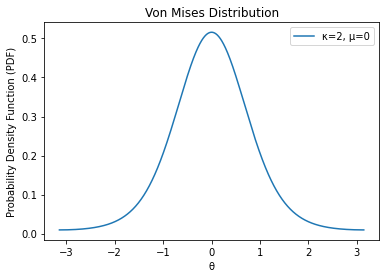

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises

# パラメータ
κ = 2  # 分布の集中度（0で一様分布になります）
μ = 0  # 平均方向

# データ生成
theta = np.linspace(-np.pi, np.pi, 1000)
pdf_values = vonmises.pdf(theta, κ, loc=μ)

# プロット
%matplotlib inline
plt.plot(theta, pdf_values, label=f'κ={κ}, μ={μ}')
plt.title('Von Mises Distribution')
plt.xlabel('θ')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()


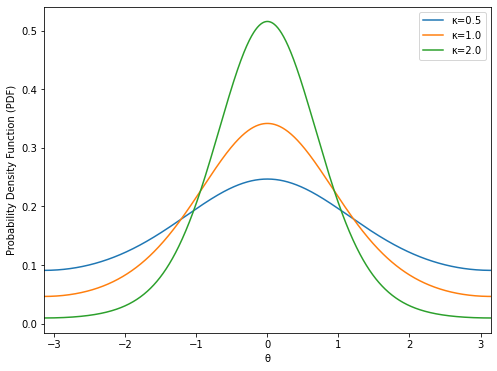

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises
import math
# パラメータ
μ = 0  # 平均方向
κ_values = [0.5, 1.0, 2.0]  # 分布の集中度

# データ生成とプロット
theta = np.linspace(-np.pi, np.pi, 1000)

plt.figure(figsize=(8, 6))  # プロットのサイズを指定

for κ in κ_values:
    pdf_values = vonmises.pdf(theta, κ, loc=μ)
    plt.plot(theta, pdf_values, label=f'κ={κ}')

#plt.title('Von Mises Distribution with Different κ Values')
plt.xlabel('θ')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()
plt.xlim(xmin=-math.pi, xmax=math.pi)
plt.show()